In [1]:
# Step 1: Load the text file and store the original content
with open('SW_EpisodeVI.txt', 'r') as file:
    original_text = file.read()

# The original_text variable now contains the unmodified content of the file.

In [2]:
import pandas as pd
from collections import Counter
import re

# Create a copy of the original text for word frequency analysis
text_for_analysis = original_text.lower()  # Convert to lowercase for uniformity

# List of character names to exclude
character_names = ["THREEPIO", "LUKE", "VADER", "REBEL OFFICER", "TROOPER", "CHIEF PILOT", "CAPTAIN",
                   "IMPERIAL OFFICER", "LEIA", "COMMANDER", "SECOND OFFICER", "BERU", "OWEN", "BEN",
                   "TARKIN", "TAGGE", "MOTTI", "HAN", "CHEWBACCA", "JABBA", "BIGGS", "CAMIE", "FIXER"]

# Remove punctuation
text_for_analysis = re.sub(r'[^\w\s]', '', text_for_analysis)

# Split into words
words = text_for_analysis.split()

# Exclude character names
filtered_words = [word for word in words if word.upper() not in character_names]

# Count word frequency
word_counts = Counter(filtered_words)

# Convert to DataFrame and sort
df_word_counts = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
df_word_counts = df_word_counts.sort_values(by='Frequency', ascending=False)

# Display top 10 most frequent words
print(df_word_counts.head(10))


     Word  Frequency
38    you        258
18    the        241
75      i        206
41     to        148
34   your        112
33     of        110
230     a         92
244    it         87
119   and         86
7      is         80


In [4]:
import pandas as pd

# Step 1: Re-read the text file to ensure fresh data
with open('SW_EpisodeVI.txt', 'r') as file:
    lines_for_analysis = file.readlines()

# Step 2: Initialize a dictionary to store dialogue counts for each character
character_dialogue_counts = {}

# Step 3: Count the number of dialogue lines for each character
for line in lines_for_analysis:
    # Remove any leading/trailing whitespace characters from the line
    line = line.strip()

    # Check if the line contains a character name followed by dialogue
    if line:
        parts = line.split(' ', 1)  # Split into two parts: character name and dialogue
        if len(parts) > 1:  # Ensure there is both a character name and dialogue
            character_name = parts[0].strip('"')  # Extract character name
            dialogue = parts[1].strip()  # Extract dialogue
            
            # Ensure that character names are uppercase and exclude general text or stage directions
            if character_name.isupper() and len(dialogue) > 0:
                if character_name in character_dialogue_counts:
                    character_dialogue_counts[character_name] += 1
                else:
                    character_dialogue_counts[character_name] = 1

# Step 4: Convert the counts to a DataFrame and sort by the number of lines
df_character_dialogue = pd.DataFrame(character_dialogue_counts.items(), columns=['Character', 'Dialogue Lines'])
df_character_dialogue = df_character_dialogue.sort_values(by='Dialogue Lines', ascending=False)

# Step 5: Display the characters with the most dialogue
print(df_character_dialogue.head(10))


Empty DataFrame
Columns: [Character, Dialogue Lines]
Index: []


In [5]:
# Read the file and print out the first 20 lines to understand the format
with open('SW_EpisodeVI.txt', 'r') as file:
    for _ in range(20):
        print(file.readline())


"character" "dialogue"

"1" "SHUTTLE CAPTAIN" "Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield."

"2" "DEATH STAR CONTROLLER" "The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by... You are clear to proceed."

"3" "SHUTTLE CAPTAIN" "We're starting our approach."

"4" "OFFICER" "Inform the commander that Lord Vader's shuttle has arrived."

"5" "OPERATOR" "Yes, sir."

"6" "JERJERROD" "Lord Vader, this is an unexpected pleasure.  We're honored by your presence."

"7" "VADER" "You may dispense with the pleasantries, Commander. I'm here to put you back on schedule."

"8" "JERJERROD" "I assure you, Lord Vader, my men are working as fast as they can."

"9" "VADER" "Perhaps I can find new ways to motivate them."

"10" "JERJERROD" "I tell you, this station will be operational as planned."

"11" "VADER" "The Emperor does not share your optimistic appraisal of the situatio

In [8]:
import pandas as pd

# Step 1: Read the text file
with open('SW_EpisodeVI.txt', 'r') as file:
    lines_for_analysis = file.readlines()

# Step 2: Initialize a dictionary to store dialogue counts for each character
character_dialogue_counts = {}

# Step 3: Refine the parsing logic based on the observed format
for line in lines_for_analysis:
    line = line.strip()  # Remove any leading/trailing whitespace

    # Split the line by double quotes to get different parts
    parts = line.split('"')
    
    # Debugging: Print the parts to verify correct splitting
    print(parts)
    
    # Ensure the line is long enough to contain both a character name and dialogue
    if len(parts) > 3:
        character_name = parts[1].strip()  # Extract character name (second item after split)
        dialogue = parts[3].strip()  # Extract dialogue (fourth item after split)
        
        # Debugging: Print extracted character name and dialogue
        print(f'Character: {character_name}, Dialogue: {dialogue}')
        
        # Increment dialogue count for each character
        if character_name.isupper() and dialogue:  # Check if the character name is uppercase and has dialogue
            if character_name in character_dialogue_counts:
                character_dialogue_counts[character_name] += 1
            else:
                character_dialogue_counts[character_name] = 1

# Step 4: Convert the dictionary to a DataFrame and sort
df_character_dialogue = pd.DataFrame(character_dialogue_counts.items(), columns=['Character', 'Dialogue Lines'])
df_character_dialogue = df_character_dialogue.sort_values(by='Dialogue Lines', ascending=False)

# Step 5: Display the characters with the most dialogue
print(df_character_dialogue.head(10))


['', 'character', ' ', 'dialogue', '']
Character: character, Dialogue: dialogue
['', '1', ' ', 'SHUTTLE CAPTAIN', ' ', "Command station, this is ST 321. Code Clearance Blue. We're starting our approach. Deactivate the security shield.", '']
Character: 1, Dialogue: SHUTTLE CAPTAIN
['', '2', ' ', 'DEATH STAR CONTROLLER', ' ', 'The security deflector shield will be deactivated when we have confirmation of your code transmission. Stand by... You are clear to proceed.', '']
Character: 2, Dialogue: DEATH STAR CONTROLLER
['', '3', ' ', 'SHUTTLE CAPTAIN', ' ', "We're starting our approach.", '']
Character: 3, Dialogue: SHUTTLE CAPTAIN
['', '4', ' ', 'OFFICER', ' ', "Inform the commander that Lord Vader's shuttle has arrived.", '']
Character: 4, Dialogue: OFFICER
['', '5', ' ', 'OPERATOR', ' ', 'Yes, sir.', '']
Character: 5, Dialogue: OPERATOR
['', '6', ' ', 'JERJERROD', ' ', "Lord Vader, this is an unexpected pleasure.  We're honored by your presence.", '']
Character: 6, Dialogue: JERJERROD
['

In [9]:
import pandas as pd

# Step 1: Read the text file
with open('SW_EpisodeVI.txt', 'r') as file:
    lines_for_analysis = file.readlines()

# Step 2: Initialize a dictionary to store dialogue counts for each character
character_dialogue_counts = {}

# Step 3: Refine the parsing logic based on the observed format
for line in lines_for_analysis:
    line = line.strip()  # Remove any leading/trailing whitespace

    # Split the line by double quotes to get different parts
    parts = line.split('"')
    
    # Ensure the line is long enough to contain both a character name and dialogue
    if len(parts) > 5:  # Need to check more than 5 parts because the parts include indices, characters, and spaces
        character_name = parts[3].strip()  # Extract character name (fourth item after split)
        dialogue = parts[5].strip()  # Extract dialogue (sixth item after split)
        
        # Increment dialogue count for each character
        if character_name.isupper() and dialogue:  # Check if the character name is uppercase and has dialogue
            if character_name in character_dialogue_counts:
                character_dialogue_counts[character_name] += 1
            else:
                character_dialogue_counts[character_name] = 1

# Step 4: Convert the dictionary to a DataFrame and sort
df_character_dialogue = pd.DataFrame(character_dialogue_counts.items(), columns=['Character', 'Dialogue Lines'])
df_character_dialogue = df_character_dialogue.sort_values(by='Dialogue Lines', ascending=False)

# Step 5: Display the characters with the most dialogue
print(df_character_dialogue.head(10))


   Character  Dialogue Lines
14       HAN             124
10      LUKE             112
6   THREEPIO              90
15      LEIA              56
5      VADER              43
16     LANDO              40
17   EMPEROR              39
9      JABBA              20
19       BEN              18
21    ACKBAR              14


In [10]:
from collections import defaultdict, Counter
import re

# Initialize a dictionary to store words by character
character_words = defaultdict(list)

# Populate the dictionary with words spoken by each character
for line in lines_for_analysis:
    line = line.strip()
    parts = line.split('"')
    
    if len(parts) > 5:
        character_name = parts[3].strip()
        dialogue = parts[5].strip()
        
        # Ensure character name is uppercase and dialogue is not empty
        if character_name.isupper() and dialogue:
            # Remove punctuation and split into words
            words = re.findall(r'\w+', dialogue.lower())
            character_words[character_name].extend(words)

# Calculate word frequency for each character
character_word_counts = {character: Counter(words) for character, words in character_words.items()}

# Example: Display the top 10 words for a specific character (e.g., 'LUKE')
character_to_analyze = 'LUKE'
df_word_frequency = pd.DataFrame(character_word_counts[character_to_analyze].items(), columns=['Word', 'Frequency'])
df_word_frequency = df_word_frequency.sort_values(by='Frequency', ascending=False)

print(f"Top 10 words used by {character_to_analyze}:")
print(df_word_frequency.head(10))


Top 10 words used by LUKE:
     Word  Frequency
8       i         69
20    you         61
5      to         34
102     t         28
79    the         26
91     it         21
25   your         20
4      me         20
37      s         19
61     my         18


In [13]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 1.2 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [14]:
from textblob import TextBlob

# Initialize a dictionary to store sentiments by character
character_sentiments = {}

# Calculate sentiment polarity for each character's dialogue
for character, dialogues in character_words.items():
    dialogue_text = ' '.join(dialogues)  # Join all dialogues into a single string
    sentiment = TextBlob(dialogue_text).sentiment.polarity
    character_sentiments[character] = sentiment

# Convert to DataFrame and sort by sentiment
df_character_sentiment = pd.DataFrame(character_sentiments.items(), columns=['Character', 'Sentiment'])
df_character_sentiment = df_character_sentiment.sort_values(by='Sentiment', ascending=False)

print("Characters sorted by sentiment polarity:")
print(df_character_sentiment.head(10))


Characters sorted by sentiment polarity:
       Character  Sentiment
36   REBEL PILOT   0.500000
35    RED LEADER   0.500000
50        ANAKIN   0.285714
37  STORMTROOPER   0.285714
11    NINEDENINE   0.257605
13        BOUSHH   0.241667
9          JABBA   0.217308
20    MON MOTHMA   0.198485
15          LEIA   0.173301
41     NAVIGATOR   0.166667


In [15]:
# Find unique words for each character
unique_words_by_character = {character: set(words) for character, words in character_words.items()}

# Calculate unique words for a specific character (e.g., 'VADER')
character_to_analyze = 'VADER'
other_characters_words = set(word for char, words in character_words.items() if char != character_to_analyze for word in words)
unique_words = unique_words_by_character[character_to_analyze] - other_characters_words

print(f"Unique words used by {character_to_analyze}:")
print(unique_words)


Unique words used by VADER:
{'indeed', 'landed', 'hide', 'failure', 'massing', 'reports', 'situation', 'deal', 'sullust', 'pointless', 'constructed', 'schedule', 'bidding', 'displeased', 'thy', 'meaning', 'nature', 'resist', 'completed', 'appraisal', 'progress', 'obey', 'especially', 'defenses', 'correct', 'arrives', 'wise', 'apparent', 'penetrated', 'companions', 'dispense', 'unwise', 'pleasantries', 'optimistic', 'share', 'motivate', 'forgiving', 'sake', 'mask'}


In [17]:
!pip install networkx

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00a 0:00:010m

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


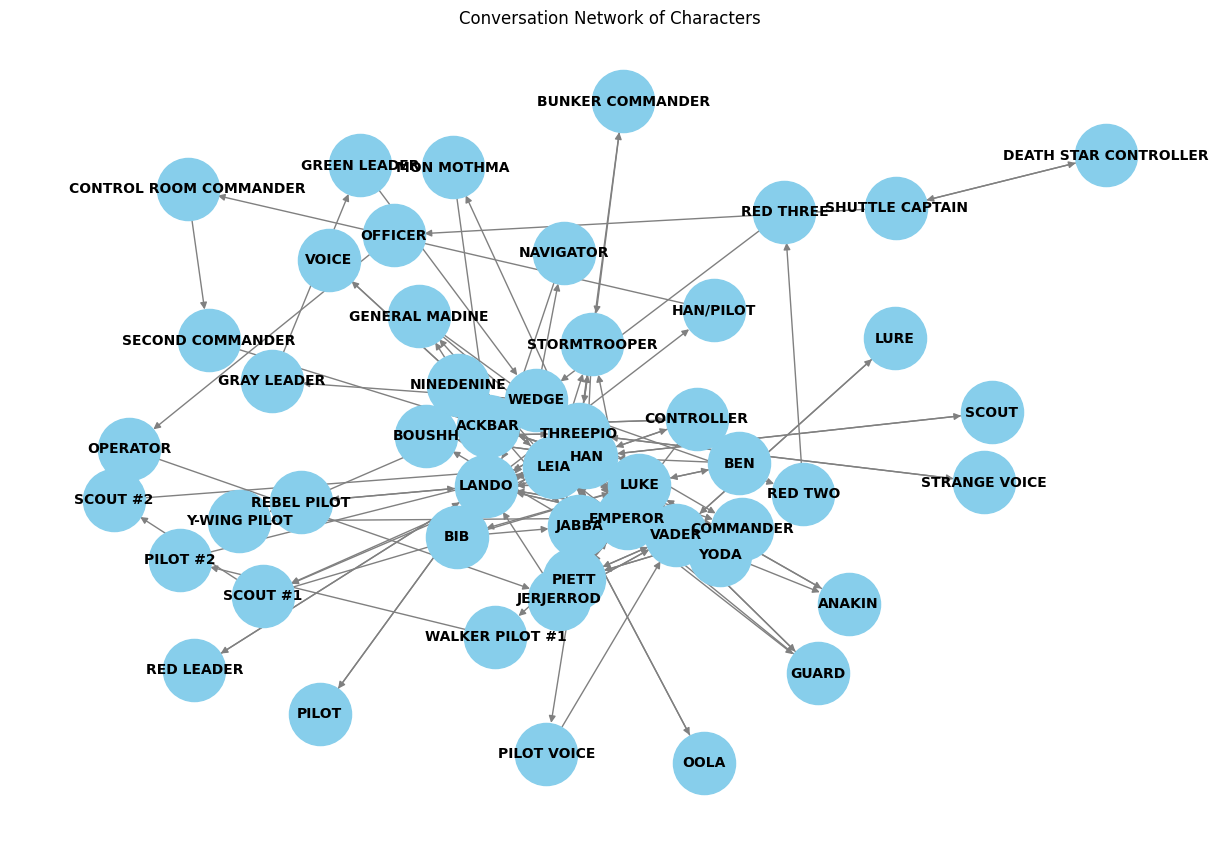

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a directed graph
G = nx.DiGraph()

# Create edges based on consecutive dialogues between characters
previous_character = None
for line in lines_for_analysis:
    line = line.strip()
    parts = line.split('"')
    
    if len(parts) > 5:
        current_character = parts[3].strip()
        if current_character.isupper():
            if previous_character and previous_character != current_character:
                if G.has_edge(previous_character, current_character):
                    G[previous_character][current_character]['weight'] += 1
                else:
                    G.add_edge(previous_character, current_character, weight=1)
            previous_character = current_character

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", edge_color='gray')
plt.title("Conversation Network of Characters")
plt.show()


In [19]:
from nltk import ngrams
from collections import Counter

# Define a function to find n-grams
def find_ngrams(input_list, n):
    return list(ngrams(input_list, n))

# Example: Find bigrams for a specific character (e.g., 'LEIA')
character_to_analyze = 'LEIA'
bigrams = find_ngrams(character_words[character_to_analyze], 2)

# Count bigram frequencies
bigram_counts = Counter(bigrams)

# Convert to DataFrame and sort
df_bigrams = pd.DataFrame(bigram_counts.items(), columns=['Bigram', 'Frequency'])
df_bigrams = df_bigrams.sort_values(by='Frequency', ascending=False)

print(f"Top 10 bigrams used by {character_to_analyze}:")
print(df_bigrams.head(10))


Top 10 bigrams used by LEIA:
          Bigram  Frequency
24    (come, on)          5
116     (don, t)          4
66    (are, you)          3
105  (hurt, you)          3
21        (i, m)          3
152      (it, s)          3
115     (i, don)          3
71      (let, s)          2
245    (i, know)          2
117    (t, know)          2


In [20]:
# Initialize a dictionary to store interaction counts
interaction_counts = defaultdict(int)

# Count consecutive dialogues between characters
previous_character = None
for line in lines_for_analysis:
    line = line.strip()
    parts = line.split('"')
    
    if len(parts) > 5:
        current_character = parts[3].strip()
        if current_character.isupper():
            if previous_character and previous_character != current_character:
                interaction_counts[(previous_character, current_character)] += 1
            previous_character = current_character

# Convert to DataFrame and sort
df_interactions = pd.DataFrame(interaction_counts.items(), columns=['Characters', 'Frequency'])
df_interactions = df_interactions.sort_values(by='Frequency', ascending=False)

print("Most frequent character interactions:")
print(df_interactions.head(10))


Most frequent character interactions:
          Characters  Frequency
34       (HAN, LUKE)         27
39       (LUKE, HAN)         22
26       (HAN, LEIA)         21
33   (THREEPIO, HAN)         20
27       (LEIA, HAN)         16
40   (HAN, THREEPIO)         16
15  (LUKE, THREEPIO)         15
47      (LUKE, LEIA)         14
48      (LEIA, LUKE)         14
50  (EMPEROR, VADER)         14


In [22]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/76/2d/6850fc318aca19bf153cba2a7e0db3060412a46611d8792056bf407bf144/wordcloud-1.9.3-cp310-cp310-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 400.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


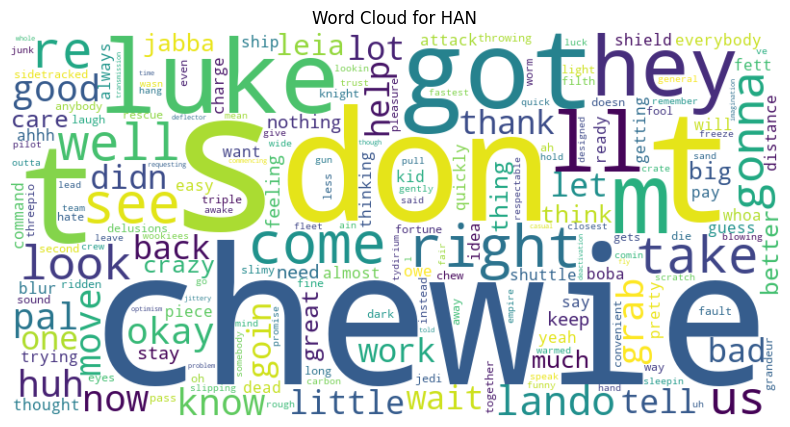

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for a specific character (e.g., 'HAN')
character_to_analyze = 'HAN'
text = ' '.join(character_words[character_to_analyze])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f"Word Cloud for {character_to_analyze}")
plt.show()


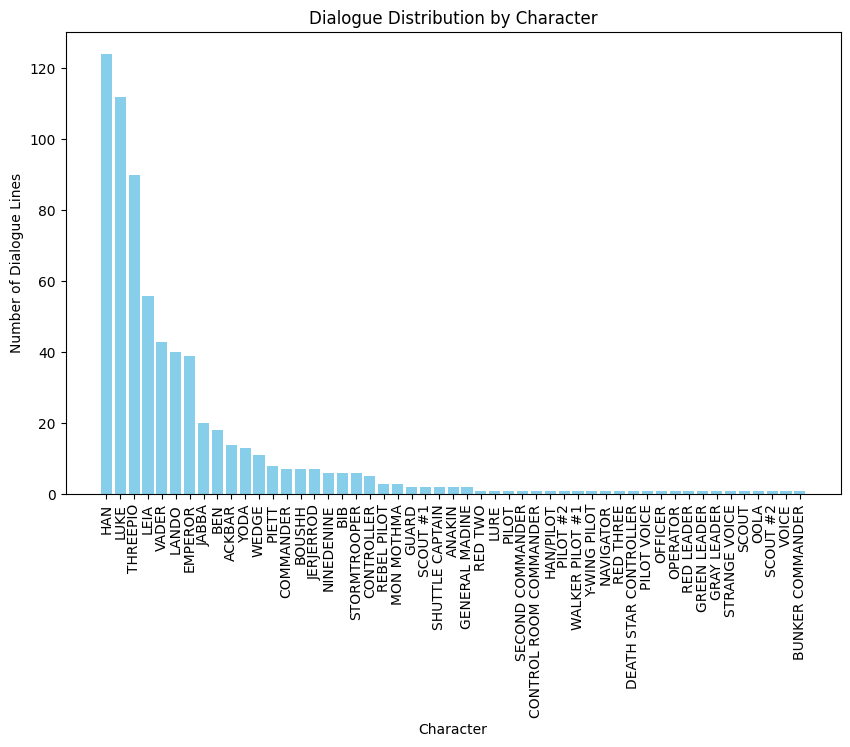

In [24]:
import matplotlib.pyplot as plt

# Plotting the dialogue distribution
plt.figure(figsize=(10, 6))
plt.bar(df_character_dialogue['Character'], df_character_dialogue['Dialogue Lines'], color='skyblue')
plt.xlabel('Character')
plt.ylabel('Number of Dialogue Lines')
plt.title('Dialogue Distribution by Character')
plt.xticks(rotation=90)
plt.show()


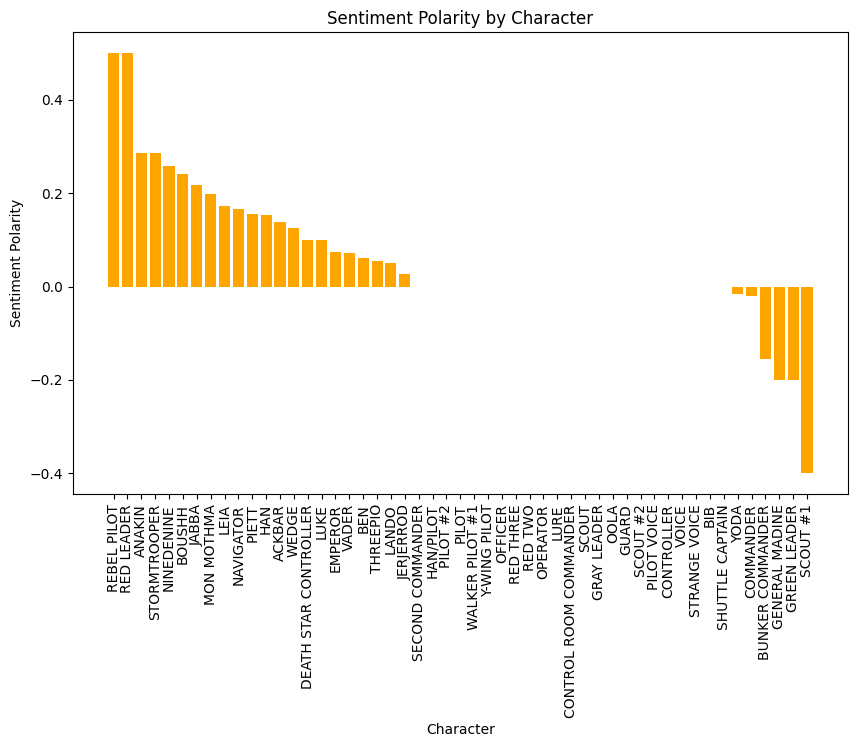

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(df_character_sentiment['Character'], df_character_sentiment['Sentiment'], color='orange')
plt.xlabel('Character')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity by Character')
plt.xticks(rotation=90)
plt.show()


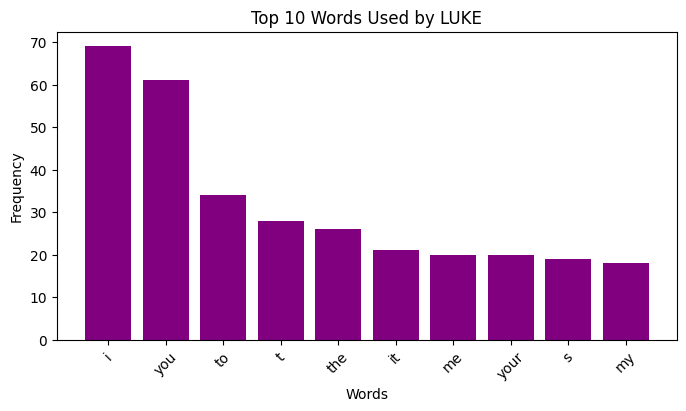

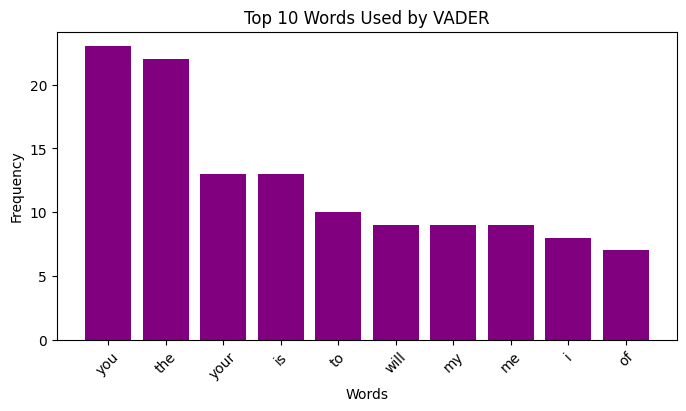

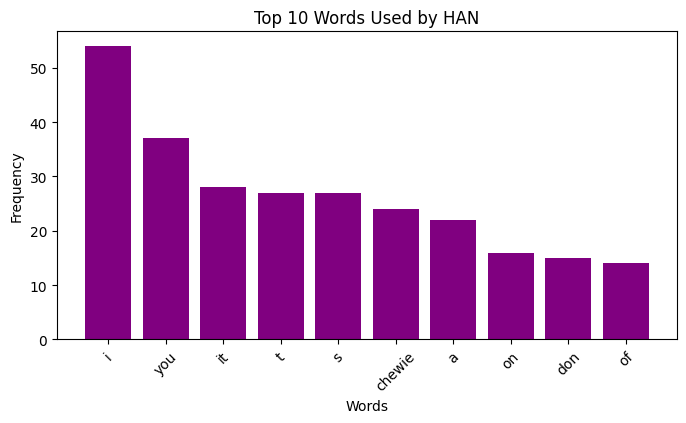

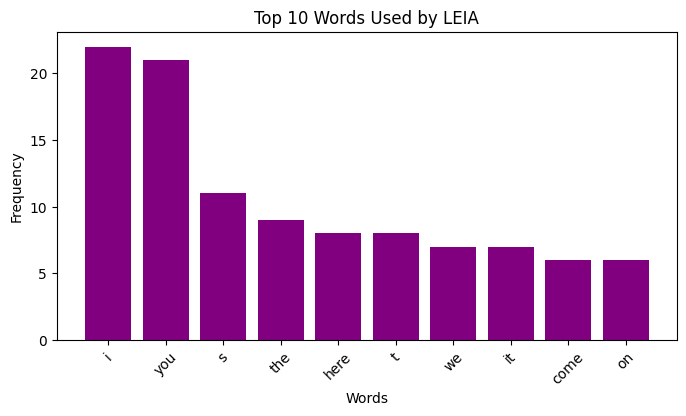

In [26]:
characters_to_analyze = ['LUKE', 'VADER', 'HAN', 'LEIA']

for character in characters_to_analyze:
    # Get top 10 words for each character
    word_freq = character_word_counts[character].most_common(10)
    words, frequencies = zip(*word_freq)

    plt.figure(figsize=(8, 4))
    plt.bar(words, frequencies, color='purple')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Words Used by {character}')
    plt.xticks(rotation=45)
    plt.show()


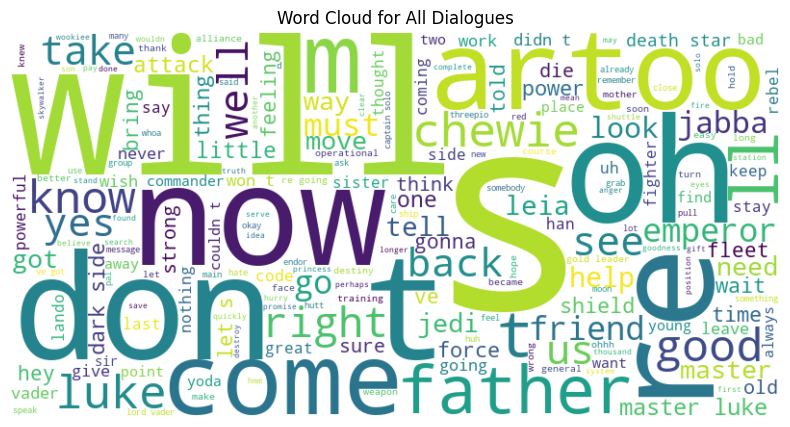

In [27]:
from wordcloud import WordCloud

# Generate a word cloud for the entire script
all_dialogue_text = ' '.join([' '.join(words) for words in character_words.values()])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_dialogue_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for All Dialogues")
plt.show()


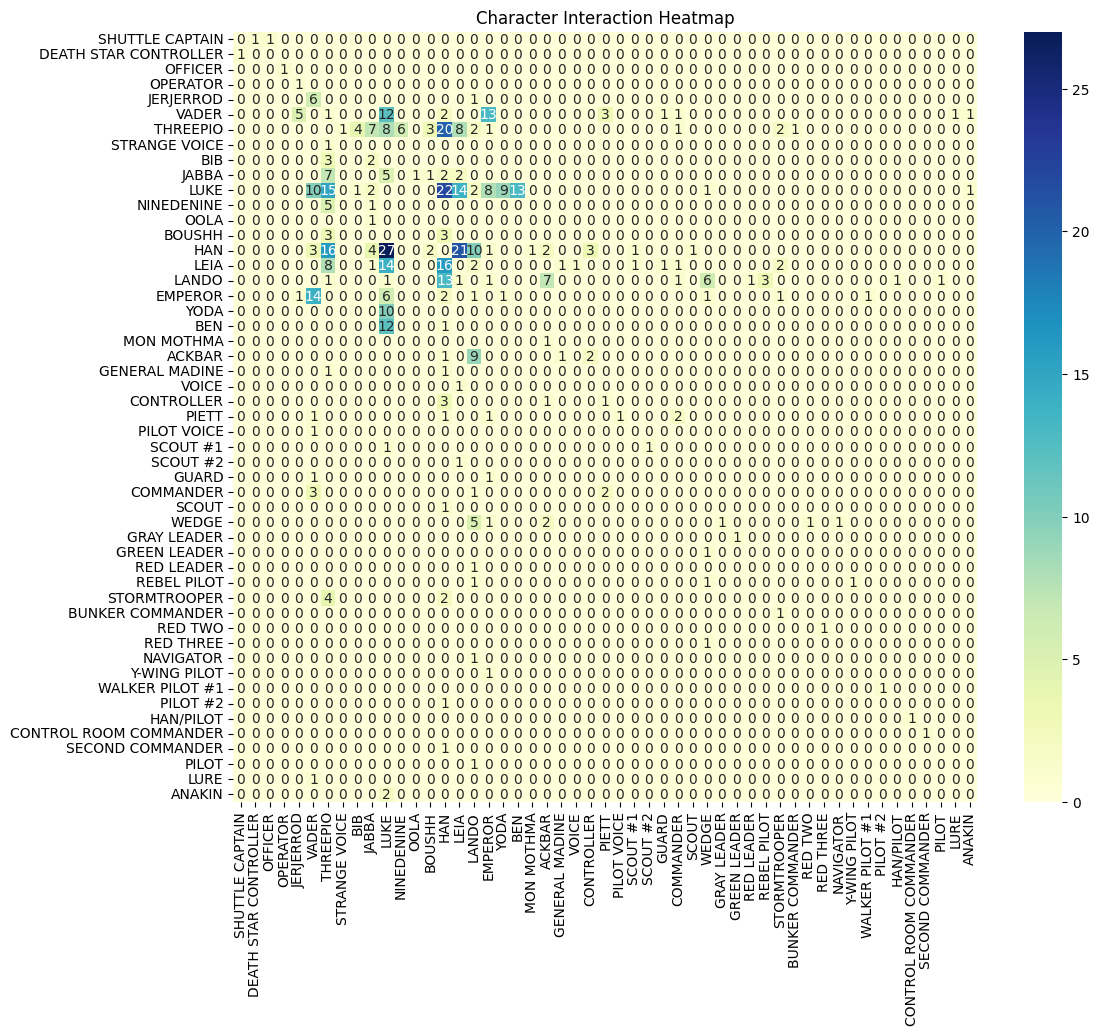

In [28]:
import seaborn as sns
import numpy as np

# Create a matrix for interactions
characters = list(character_dialogue_counts.keys())
interaction_matrix = np.zeros((len(characters), len(characters)))

# Fill the matrix with interaction counts
character_to_index = {character: i for i, character in enumerate(characters)}
for (char1, char2), count in interaction_counts.items():
    i, j = character_to_index[char1], character_to_index[char2]
    interaction_matrix[i, j] = count

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(interaction_matrix, xticklabels=characters, yticklabels=characters, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title('Character Interaction Heatmap')
plt.show()


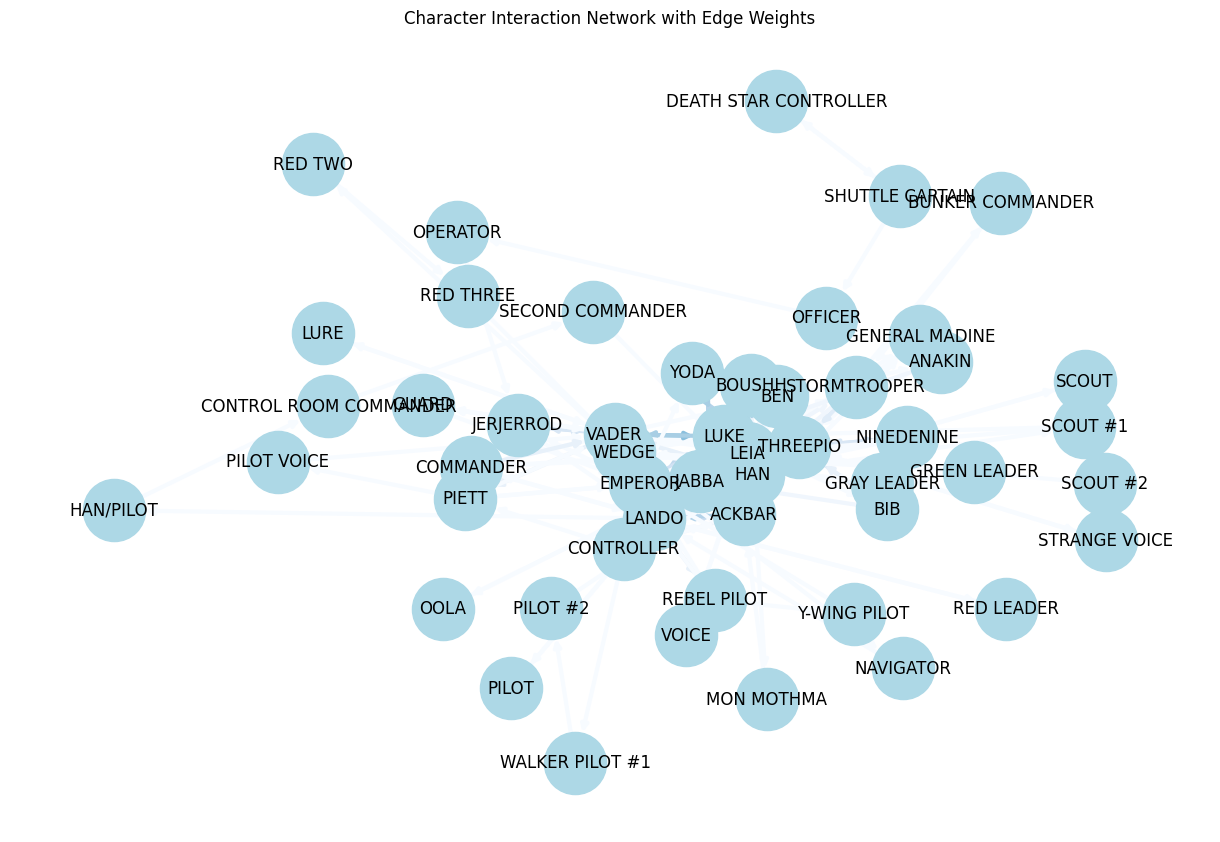

In [29]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, node_color='lightblue', with_labels=True, node_size=2000, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues)
plt.title("Character Interaction Network with Edge Weights")
plt.show()


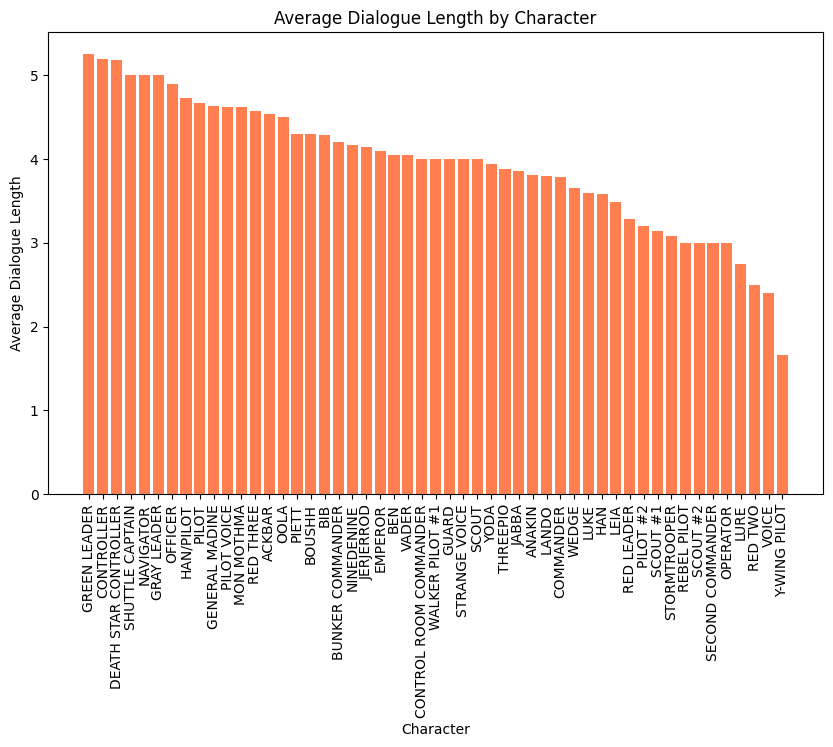

In [30]:
# Calculate average dialogue length for each character
dialogue_lengths = {character: np.mean([len(dialogue) for dialogue in dialogues]) for character, dialogues in character_words.items()}

# Convert to DataFrame and sort
df_dialogue_lengths = pd.DataFrame(dialogue_lengths.items(), columns=['Character', 'Average Dialogue Length'])
df_dialogue_lengths = df_dialogue_lengths.sort_values(by='Average Dialogue Length', ascending=False)

# Plot average dialogue length by character
plt.figure(figsize=(10, 6))
plt.bar(df_dialogue_lengths['Character'], df_dialogue_lengths['Average Dialogue Length'], color='coral')
plt.xlabel('Character')
plt.ylabel('Average Dialogue Length')
plt.title('Average Dialogue Length by Character')
plt.xticks(rotation=90)
plt.show()


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Example comparison between 'LUKE' and 'VADER'
characters_to_compare = ['LUKE', 'VADER']
texts = [' '.join(character_words[char]) for char in characters_to_compare]

vectorizer = CountVectorizer().fit_transform(texts)
vectors = vectorizer.toarray()
cosine_matrix = cosine_similarity(vectors)

print(f"Cosine similarity between {characters_to_compare[0]} and {characters_to_compare[1]}: {cosine_matrix[0, 1]:.2f}")


Cosine similarity between LUKE and VADER: 0.79
